In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
housing_data = pd.read_csv("housing_prediction.csv")

In [128]:
housing_data.info(), housing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


(None,
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                  41          880           129.0   
 1    -122.22     37.86                  21         7099          1106.0   
 2    -122.24     37.85                  52         1467           190.0   
 3    -122.25     37.85                  52         1274           235.0   
 4    -122.25     37.85                  52         1627           280.0   
 
    population  households  median_income ocean_proximity  median_house_value  
 0         322         126         8.3252        NEAR BAY              452600  
 1        2401        1138         8.3014        NEAR BAY              358500  
 2         496         177         7.2574        NEAR BAY              352100  
 3         558         219         5.6431        NEAR BAY              341300  
 4         565         259         3.8462        NEAR BAY              342200  )

In [129]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [130]:
housing_data.head(7)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200


In [131]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

We have 207 missing values in the "total_bedrooms" column

In [132]:
# Fill missing values with median
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [140]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)

 Encode 'ocean_proximity' using one-hot encoding

In [141]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(4), int64(5

In [142]:
# Check for any remaining missing values
missing_values = housing_data.isnull().sum()
missing_values

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

There are no longer any missing values

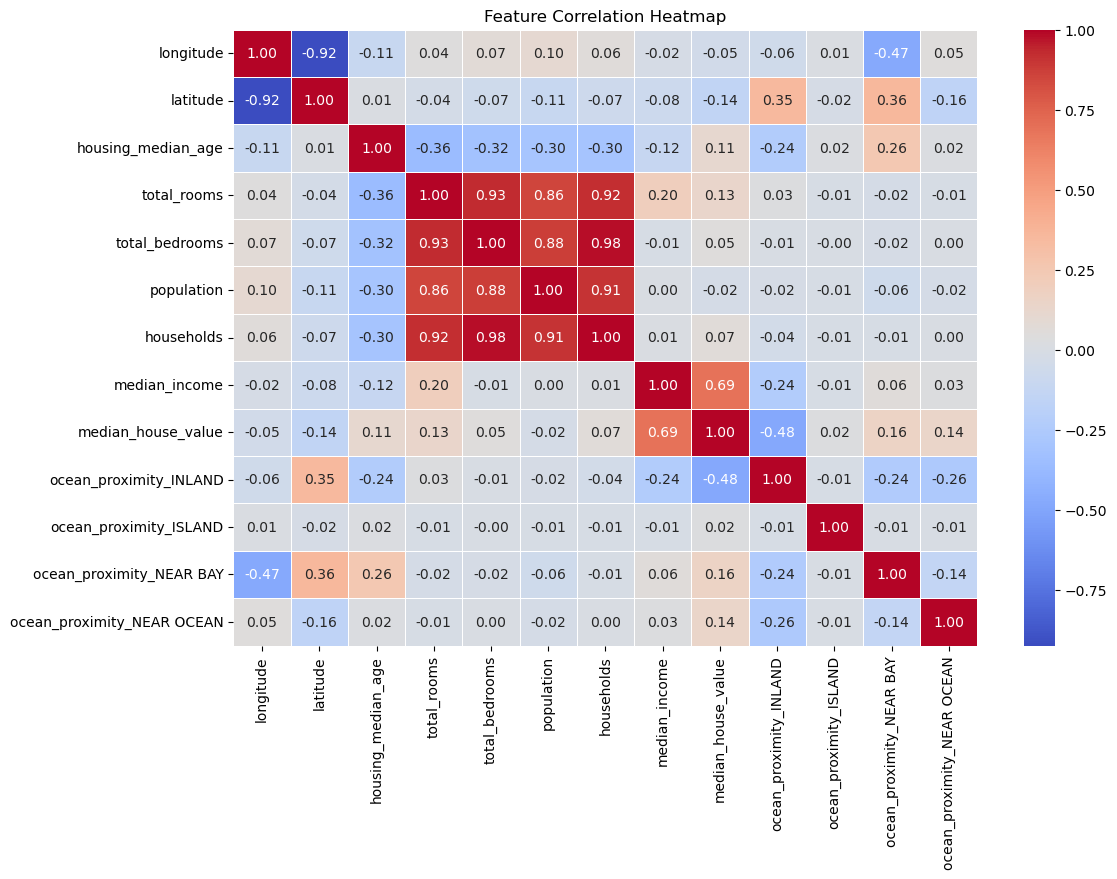

In [143]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(housing_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

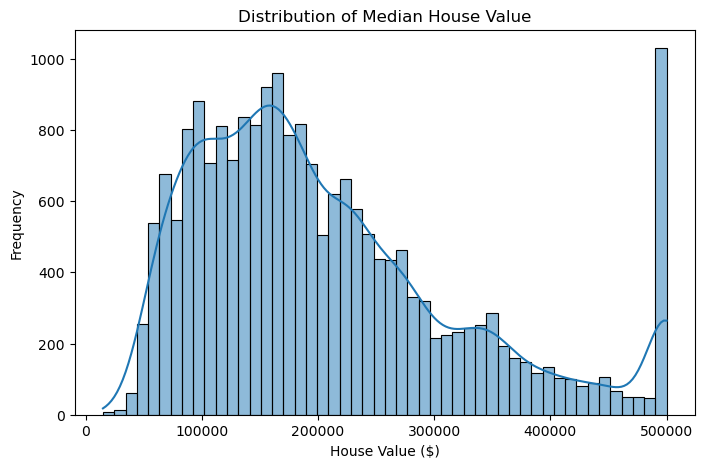

In [145]:
# Histogram of median house value
plt.figure(figsize=(8, 5))
sns.histplot(housing_data['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($)")
plt.ylabel("Frequency")
plt.show()

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = housing_data.drop(columns=["median_house_value"])
y = housing_data["median_house_value"]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the scaled training set
X_train_scaled.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.680574,-0.015566,-0.355646,2.629758
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.680574,-0.015566,-0.355646,2.629758
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,-0.680574,-0.015566,-0.355646,2.629758
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.680574,-0.015566,-0.355646,2.629758
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,1.469348,-0.015566,-0.355646,-0.380263


In [150]:
# Check for missing values in X_test before prediction
missing_values_test = X_test_scaled.isnull().sum().sum()

# If there are missing values, fill them with the median
if missing_values_test > 0:
    X_test_scaled.fillna(X_test_scaled.median(), inplace=True)

# Re-run regression models after handling NaNs
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "MAE": mae, "MSE": mse, "R2 Score": r2})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)


# Explicitly print results
results_df


,Model,MAE,MSE,R2 Score
0,Linear Regression,50671.609760,4.909162e+09,0.625372
1,Ridge Regression,50668.992632,4.908723e+09,0.625405
2,Lasso Regression,50671.549089,4.909152e+09,0.625373
3,Random Forest,31628.937505,2.401268e+09,0.816754
4,Gradient Boosting,38248.738775,3.123498e+09,0.761639
